In [2]:
import urllib2
import json
import re
import io
import copy
import nltk, re, pprint
import os
import time
import calendar
import datetime
from threading import Thread
from time import sleep
from __future__ import division
import codecs

In [127]:
y = 0
for f in os.listdir("DoneMoviesReviews/"):
    if f[-4:] == ".txt" and (not os.path.isfile("DoneMovies2/" + f)):                          
        try:
            os.remove("DoneMoviesReviews/" + f)
            y = y+1
        except OSError:
            pass
print y   

95


In [ ]:
import urllib2
import codecs
from HTMLParser import HTMLParser
import os
totalNumberOfFiles = len(os.listdir("DoneMovies/"))
countt = 0
for f in os.listdir("DoneMovies/"):
    if f[-4:] == ".txt" and (not os.path.isfile("DoneMoviesReviews/" + f) or os.path.getsize("DoneMoviesReviews/" + f) == 0):
        idd = f[:-4]

        response = urllib2.urlopen('http://www.imdb.com/title/' + idd + '/reviews')
        html2 = response.read()

        div = html2.split("tn15content")[1]
        parts = div.split("<b>Author:</b>")
        parts.pop(0)
        h = HTMLParser()
        res = []
        for part in parts:
            try:
                dataa = h.unescape(part.split("</div>\n<p>")[1].split("</p>")[0].replace("<br>", "\n"))
                f = codecs.open("temp.txxt", "w", "utf-8")
                f.write("<|_=00=_|>".join([dataa]))
                f.close()
                res.append(dataa)
            except Exception as e:
                pass            
        try:
            f = codecs.open("DoneMoviesReviews/" + idd + ".txt", "w", "utf-8")
            f.write("<|_=00=_|>".join(res))
            f.close()
        except Exception as e:
            pass
    countt += 1
    print countt / float(totalNumberOfFiles)

<h3>SENTIMENT</h3>

In [19]:
with codecs.open("DoneMoviesReviews/" + "tt0466839" + ".txt", "r", "utf-8") as myfile:
    datatest=myfile.read().replace('\n', '')
    datatest=datatest.replace("<|_=00=_|>", "")
    datatest = re.sub('[^a-zA-Z0-9-_*.]', ' ', datatest)

In [20]:
import nltk
import string

# the LabMT wordlist can now be found at the path below.
# PREPARING THE DATA SET 
labmt = open('Data_Set_S1.txt','r').read()
labmt  =nltk.word_tokenize(labmt) # the set is tokenized, to be able to access the values as list elements
#labmt[labmt.index('laughter')+1]
labmt = labmt[labmt.index('laughter'):] # A little hard coding to remove problematic text from labmt set
# EXTRACT ONLY THE WORDS FROM THE DATA SET
words_in_labmt = re.findall('[\D]+',' '.join(labmt).translate(None, string.punctuation)) # find all words that are not digits                                                                                          #and remove punctuation
words_in_labmt = re.findall('[\S]+',' '.join(words_in_labmt)) # exclude whitespaces

In [21]:
#REMOVE ANY WORDS THAT HAVE BEEN GENERATED ABOVE, THAT ARE NOT IN LABMT
remove = set() # set of words to exclude from 'words_in_labmt'
labmt_valence = {} # dictionary to contain words from 'words_in_labmt' as keys and their corresponding valence as values.
for word in words_in_labmt: 
    if word not in labmt: 
        remove.add(word)  # add word to remove to 'remove' set
    else:
        valence = float(labmt[labmt.index(word)+2])  # get valence score from labmt
        if valence <= 10.0:          # check that valence score is within the expected interval. 
            labmt_valence[word] = valence               
        else: remove.add(word)   
# exclude the words in 'remove'-set from 'words_in_labmt':
words_in_labmt = set(words_in_labmt).difference(set(remove)) 

In [22]:
from __future__ import division
def sentiment(tokenList):
    sentimentScore = 0.0
    for w in tokenList:
        if w in words_in_labmt:
            word = w.lower()
            sentimentScore = sentimentScore + float(labmt_valence.get(word))
    if sentimentScore == 0.0:
        print "No Sentiment Words"
        return sentimentScore
    else:
        return sentimentScore/len(tokenList)

In [23]:
movieSentiment = {}
for f in os.listdir("DoneMovies2/"):
    with codecs.open("DoneMoviesReviews/" + f[:-4] + ".txt", "r", "utf-8") as myfile:
        data=myfile.read().replace('\n', '')
        data=data2.replace("<|_=00=_|>", "")
        data = re.sub('[^a-zA-Z0-9-_*.]', ' ', data)
        movieSentiment[""+f[:-4]]=sentiment(data)

In [7]:
print sorted(movieSentiment.values())[:10]
print sorted(movieSentiment.values(), reverse = True)[:10]

[3.6179115584017802, 3.6542073793202716, 3.680612808408223, 3.687155570424743, 3.688344827586197, 3.691254752851643, 3.69287356321839, 3.7023720552396417, 3.702385396276194, 3.708941592920214]
[4.054541108986618, 4.015226411075605, 4.011636243821866, 4.0020534790958555, 3.993211626574829, 3.987272583075448, 3.98676448073465, 3.983348328481988, 3.982735312341372, 3.9813453318334786]


<h3>SCORE</h3>

In [3]:
movieScore = {}
for f in os.listdir("DoneMovies2/"):
    jsondata = io.open("DoneMovies2/" + f, 'r', encoding='utf-8')
    sidensJson = json.load(jsondata)
    movieScore[""+f[:-4]]=sidensJson["vote_average"]
    jsondata.close()

In [16]:
print sorted(movieScore.values())[:10]
print sorted(movieScore.values(), reverse = True)[:10]

[1.9, 2.0, 2.3, 2.6, 2.8, 3.0, 3.0, 3.0, 3.0, 3.0]
[10.0, 9.0, 8.7, 8.6, 8.5, 8.5, 8.5, 8.4, 8.3, 8.3]


<h3>Budget</h3>

In [29]:
movieBudget = {}
for f in os.listdir("DoneMovies2/"):
    jsondata = io.open("DoneMovies2/" + f, 'r', encoding='utf-8')
    sidensJson = json.load(jsondata)
    movieBudget[""+f[:-4]]=sidensJson["budget"]
    jsondata.close()

In [40]:
print sorted(movieBudget.values())[:10]
print sorted(movieBudget.values(), reverse = True)[:10]

[10000, 11178, 11180, 15000, 17000, 20000, 22361, 22361, 22361, 24554]
[380000000, 300000000, 280000000, 270000000, 260000000, 260000000, 258000000, 255000000, 250000000, 250000000]


<h3>REVENUE</h3>

In [28]:
movieRevenue = {}
for f in os.listdir("DoneMovies2/"):
    jsondata = io.open("DoneMovies2/" + f, 'r', encoding='utf-8')
    sidensJson = json.load(jsondata)
    movieRevenue[""+f[:-4]]=sidensJson["revenue"]
    jsondata.close()

In [46]:
print sorted(movieRevenue.values())[:10]
print sorted(movieRevenue.values(), reverse = True)[:10]

[10000, 10018, 10289, 10300, 10474, 11276, 11455, 12000, 12762, 13308]
[2787965087L, 2068223624, 1845034188, 1519557910, 1513528810, 1506249360, 1405403694, 1342000000, 1274219009, 1262886337]


<h3>Gross Income<h3>

In [26]:
movieIncome = {}
for f in os.listdir("DoneMovies2/"):
    jsondata = io.open("DoneMovies2/" + f, 'r', encoding='utf-8')
    sidensJson = json.load(jsondata)
    movieIncome[""+f[:-4]]=(sidensJson["revenue"] - sidensJson["budget"])
    jsondata.close()

In [39]:
print sorted(movieIncome.values())[:10]
print sorted(movieIncome.values(), reverse = True)[:10]

[-165710090, -119180039, -111007242, -98301101, -92896027, -87982678, -85321445, -84540684, -80445998, -79627709]
[2550965087L, 1823223624, 1645034188, 1363528810, 1316249360, 1299557910, 1217000000, 1125403694, 1124219009, 1102886337]


<h3>Gross Income Ratio<h3>

In [27]:
movieIncomeRatio = {}
for f in os.listdir("DoneMovies2/"):
    jsondata = io.open("DoneMovies2/" + f, 'r', encoding='utf-8')
    sidensJson = json.load(jsondata)
    movieIncomeRatio[""+f[:-4]]=(sidensJson["revenue"] / sidensJson["budget"])
    jsondata.close()

In [38]:
print sorted(movieIncomeRatio.values())[:10]
print sorted(movieIncomeRatio.values(), reverse = True)[:10]

[0.00051445, 0.00087395, 0.0011339384615384614, 0.0012, 0.0012882424242424242, 0.0013586666666666667, 0.0014, 0.0015333333333333334, 0.0017472, 0.00205725]
[12890.386666666667, 4133.333333333333, 700.0, 439.6165846153846, 426.6441, 420.52272307692306, 262.8199991055856, 250.0, 215.3846153846154, 155.84255]


<h3>SCATTER PLOTS</h3>

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

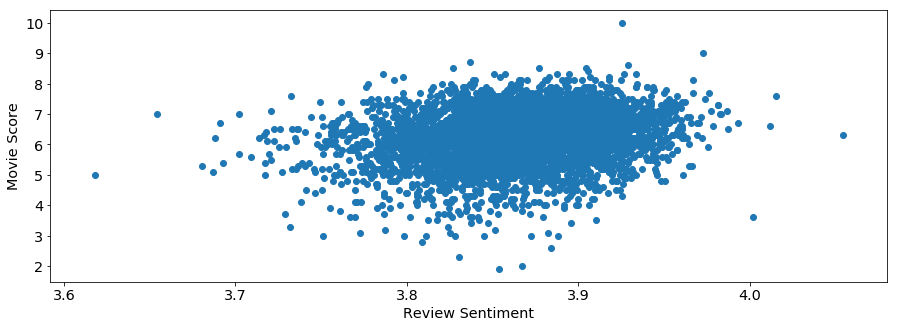

In [36]:
plt.scatter(movieSentiment.values(), movieScore.values())
plt.xlabel("Review Sentiment")
plt.ylabel("Movie Score")
plt.show()

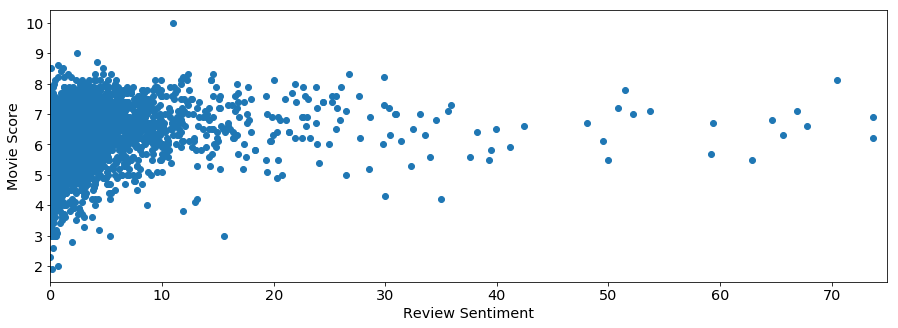

In [18]:
plt.scatter(movieIncomeRatio.values(), movieScore.values())
plt.xlabel("Review Sentiment")
plt.ylabel("Movie Score")
plt.xlim([0,75])
plt.show()

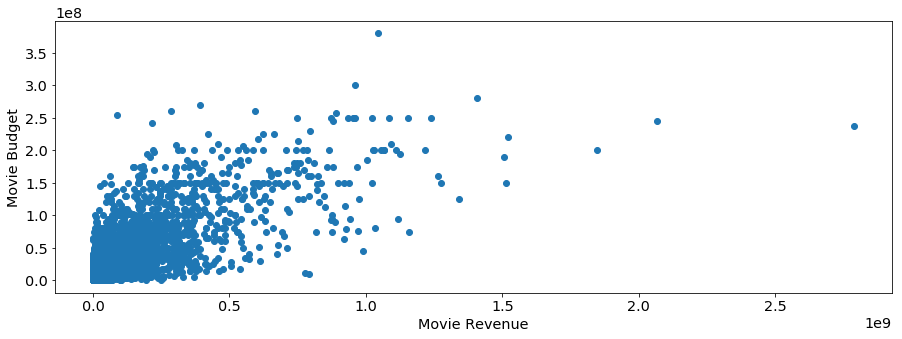

In [42]:
plt.scatter(movieRevenue.values(), movieBudget.values())
plt.xlabel("Movie Revenue")
plt.ylabel("Movie Budget")
plt.show()

<h3>Attribute Correlation</h3>

In [34]:
import pandas as pd

In [35]:
datamatrix = pd.DataFrame({'User Score': movieScore.values(),'Sentiment': movieSentiment.values(),'Budget': movieBudget.values(), 'Income': movieIncome.values(), 'Income Ratio': movieIncomeRatio.values(), 'Revenue': movieRevenue.values()})

In [37]:
datamatrix.corr()

,Budget,Income,Income Ratio,Revenue,Sentiment,User Score
Budget,1.000000,0.582307,-0.022553,0.727765,-0.069845,0.069169
Income,0.582307,1.000000,0.025510,0.981338,-0.063111,0.259909
Income Ratio,-0.022553,0.025510,1.000000,0.016186,-0.016669,0.002273
Revenue,0.727765,0.981338,0.016186,1.000000,-0.069761,0.235622
Sentiment,-0.069845,-0.063111,-0.016669,-0.069761,1.000000,0.216589
User Score,0.069169,0.259909,0.002273,0.235622,0.216589,1.000000
